# Benford's Law Application and Analysis 
### **A Python-based Case Study**

## Introduction 

First, it is necessary to establish the context in both the case's aim and relevant theory. This study is centered around the analysis of Benford's law. The aim is to determine whether the distribution of digits in a number is consistent with Benford's law. This is done by comparing the distribution of digits in a number to Benford's law, specifically the distribution of the leading digit of a number.

We will first apply Benford's law to generate Fibonacci numbers. If the law is consistent, we should see a frequency percentage in the table below. After, we will analyze a synthetic financial fraud dataset and compare the frequency of leading digits to Benford's law to determine if fraud has occurred. I hypothesize that the Fibonacci Sequence will align with Benford's Law; however, the synthetic fraud data will yield significant substantive results and raise concerns about the statistical significance. This is because of the generation of synthetic fraud and its implications on external validity.

Benford's law, also known as the first-digits law, observes that the leading digit is likely to be small in many real-life numerical data sets (Arno et al., 2011). In sets that obey the law, the number one appears as the significant leading digit about 30% of the time, while nine appears as the significant leading digit less than 5% of the time (Weisstein, 2015). In theory, if the numbers were to be uniformly distributed, they would show up 11% of the time. Benford's law predicts distributions for all digits, from one to nine (Weisstein, 2015). Benford's law outlines the probability of leading digits in natiral datasets with a large magnitude of order as the following: 

|Leading digit | Frequency |
| --- | --- | 
| 1 | 30.10% |
| 2 | 17.61% |
| 3 | 12.49% |
| 4 | 9.69% |
| 5 | 7.92% |
| 6 | 6.69% | 
| 7 | 5.80% |
| 8 | 5.12% | 
| 9 | 4.58% |

## Importing Libraries

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

## Generating Fibonacci Data

The first step in the case study is to generate Fibonacci data to see if Benford's law holds true. We will generate the first 25,000 values in the Fibonacci sequence to test the law.  

In [ ]:
f=[1,1]

for i in range(2500):
    f.append(f[i]+f[i+1])

In [ ]:
fib_data = str(f) # Saving the fibonacci number in a list to seperate variable

In [19]:
fib_data = [e[1:2] for e in fib_data.split(',')]

list

In [ ]:
fib_data = list(map(int,fib_data))

## Frequency Distribution

In [20]:
freq = {}

def count_digits(num):
    remainder = num % 10
    if remainder not in freq:
        freq[remainder] = 1
    else:
        freq[remainder] += 1
    num = num // 10
    if num == 0:
        return
    else:
        count_digits(num)

for num in fib_data: 
    count_digits(num)

{1: 753, 2: 441, 3: 313, 5: 199, 8: 130, 6: 166, 9: 114, 4: 241, 7: 145}


## Calculating average

In [21]:
for key in freq:
    freq[key] = freq[key]/len(fib_data) * 100 # Calculating the percentage of the frequency

print(freq)

{1: 30.09592326139089, 2: 17.62589928057554, 3: 12.509992006394885, 5: 7.953637090327738, 8: 5.1958433253397285, 6: 6.634692246203038, 9: 4.556354916067146, 4: 9.632294164668265, 7: 5.795363709032774}


## Fibanacci Visualization & Benford's Law Comparison

In [22]:
fib_df = pd.DataFrame.from_dict(freq, orient='index') # Converting dictionary to dataframe
fib_df.columns = ['Frequency']
fib_df.index.name = 'Digits'
fib_df = fib_df.sort_index()

print(fib_df) # Titling the dataframe

        Frequency
Digits           
1       30.095923
2       17.625899
3       12.509992
4        9.632294
5        7.953637
6        6.634692
7        5.795364
8        5.195843
9        4.556355


Immediately, we can compare the frequency distribution generated by our manipulation of the Fibanacci dataset. Comparing these values to the original Benford's law distribution table in the introduction yields similar results. We can see that 1 leads 30.095% which is consistent with Benford's 30.10%. This is reitirated for the result of the digits, thus the Fibonacci sequence proves that Benford's Law hold true. It should be noted that there are small descrepencies between expected and observed values, the law does not outline a preceise distribution but rather a general pattern which holds true in this scenario.

<Axes: title={'center': "Benford's Law for Fibbonacci sequence"}, xlabel='Digits'>

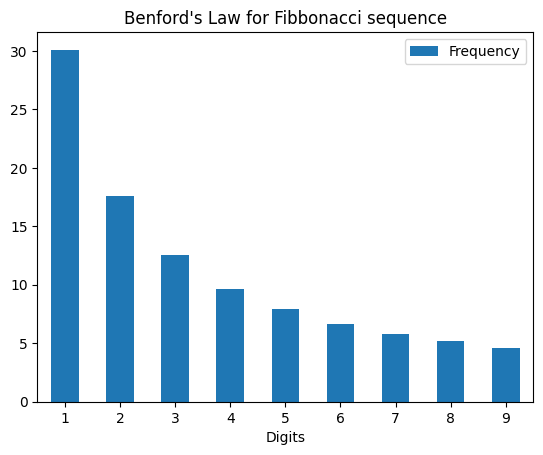

In [23]:
fib_df.plot.bar(y = 'Frequency', title = 'Benford\'s Law for Fibbonacci sequence', rot = 360) # Plotting the dataframe

## Financial Fraud Detection

Next, we will apply Benford's law to a synethic financial fraud dataset and compare results to analyze the extent of which fraud can be detected. A case between substanstial significance versus statistical significance will need to be made in order to truly achieve a result. 

First, we will import a synthetic financial fraud dataset from [Kaggle](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download). The context to the data is as follows: *"There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection (Lopez-Rojas, 2016). Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets. We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem (Lopez-Rojas, 2016). PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods (Lopez-Rojas, 2016)."* 

Edgar Lopez-Rojas, the author of the Kaggle dataset also explains that PaySim was utilized to generate the synthetic data. According to his post, PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

Another consideration worth nothing is that this synthetic dataset is scaled down 1/4 of the original dataset.




### Importing Synthethic Financial Data

In [24]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv') # Reading the csv file

In [25]:
fraud_df = df.copy()

In [26]:
fraud_df = fraud_df['amount'] # Selecting the amount column

### Applying Benford's Law

In [27]:
lst = []
freq_fraud = {}

In [28]:
for x in fraud_df: # Looping through the amount column
  lst.append(x) # Appending the amount column to the list

In [29]:
for num in lst: # Looping through the list
  if str(num)[0] not in freq_fraud.keys(): # Checking if the first digit is not in the dictionary
    freq_fraud[str(num)[0]] = 1 # If it is not in the dictionary, add it to the dictionary
  else: # If it is in the dictionary add 1 to the value
    freq_fraud[str(num)[0]] += 1  

In [30]:
for key in freq_fraud:
  freq_fraud[key] = (freq_fraud[key]/len(lst))* 100 # Calculating the percentage of the frequency

print(freq_fraud)

{'9': 4.310284128236481, '1': 33.59493416234193, '7': 4.807940753966133, '4': 8.277816371243294, '5': 6.219890548233275, '3': 12.548384156212379, '2': 20.46545291090777, '6': 5.253857687556384, '8': 4.519364664242089, '0': 0.002074617060267626}


<Axes: title={'center': "Benford's Law for Fraud Data"}, xlabel='Digits'>

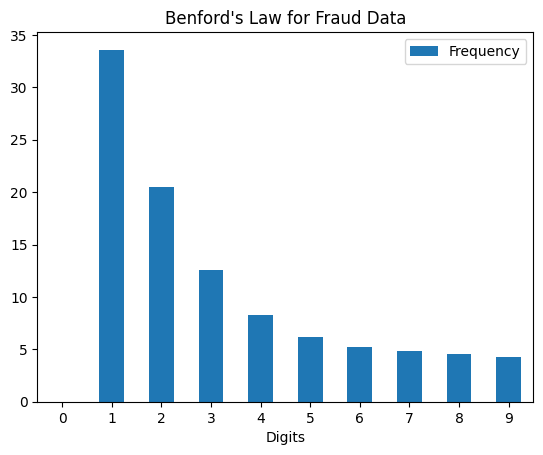

In [31]:
fraud_df = pd.DataFrame.from_dict(freq_fraud, orient='index') # Converting dictionary to dataframe
fraud_df.columns = ['Frequency']
fraud_df.index.name = 'Digits'
fraud_df = fraud_df.sort_index()

fraud_df.plot.bar(y = 'Frequency', title = 'Benford\'s Law for Fraud Data', rot = 360) # Plotting the dataframe

## Goodness of Fit Test
### Chi-Squared Calculation

In [34]:
def benfords_law(data_column):
    # Get the leading digit frequencies according to Benford's Law
    benford_freq = np.array([math.log10(1 + 1 / d) * 100 for d in range(1, 10)])
    
    # Calculate the actual leading digit frequencies in the data
    leading_digits = data_column.astype(str).str.replace(r"\D", "").str[0].astype(int)
    data_freq = leading_digits.value_counts(normalize=True, sort=False) * 100
    data_freq = data_freq.reindex(range(1, 10), fill_value=0)
    
    # Calculate the Chi-Squared test statistic
    chi_squared = sum((data_freq - benford_freq) ** 2 / benford_freq)
    
    return chi_squared

In [35]:
chi_squared_statistic = benfords_law(df['amount'])

In [36]:
print(f"Chi-Squared Statistic: {chi_squared_statistic:.2f}")

Chi-Squared Statistic: 2.00


### Calculating Statistical Significance

In [38]:
degrees_of_freedom = 8  # For 9 leading digits, the degrees of freedom will be 9 - 1 = 8
p_value = 1 - stats.chi2.cdf(chi_squared_statistic, degrees_of_freedom)

In [39]:
print(f"P-value: {p_value:.4f}")

P-value: 0.9809


## Findings 

TThe table below presents the distribution percentages for the synthetic financial fraud data. It reveals notable differences in the distribution of leading digits, specifically for digits one and two, when compared to both the expected Benford's Law distribution and the Fibonacci sequence distribution. Similar deviations from the expected values are also observed for digits four to seven, although these digits occur less frequently than one and two. These findings are further supported by the visualizations presented throughout this case study.

These observations are intriguing as it is plausible to assume that individuals engaging in fraudulent activities may be more inclined to enter amounts with higher leading digits in order to maximize their ill-gotten gains. Alternatively, the variation in the selected amounts could be a deliberate tactic employed to avoid detection. However, it is important to acknowledge that determining the exact reasons behind these deviations and the intentions behind the chosen amounts remains elusive. Conducting an experiment where participants are assigned to commit fraud, contrasting with a control group entering their typical transaction amounts, could shed light on the psychological factors at play among fraudsters. Additionally, capturing various environmental variables associated with such an experiment could provide valuable insights and expand the available dataset for analysis.

The above revised paragraph takes into account the understanding that a high p-value (0.9809) suggests that there is not enough evidence to conclude a significant deviation from Benford's Law. It acknowledges the observed differences but refrains from making strong conclusions or assumptions about the intentions or motivations behind the observed data. Instead, it suggests potential avenues for further research and data collection to gain a deeper understanding of the underlying factors contributing to the observed patterns.

Last, it is necessary to address the outlier in the dataset. This is evidenced by the appearance of 0 in the distribution percentage. It is illogical for 0 to be the first digit in an amount entered in a given transaction, as this would not appear in the final ledger and does not add value to the transaction. I suspect this is an issue with generating synthetic data, a real dataset would probably not have such outliers. 


| **Digit** | **Fraud Distribution Percentage (%)** | **Fibonacci Distribution Percentage (%)** | **Expected Distribution Percentage (%)** |
|-----------|---------------------------------------|-------------------------------------------|------------------------------------------|
|     1     | 33.59493416234193                     | 30.095923                                 | 30.10                                    |
|     2     | 20.46545291090777                     | 17.625899                                 | 17.61                                    |
|     3     | 12.548384156212379                    | 12.509992                                 | 12.49                                    |
|     4     | 8.277816371243294                     | 9.632294                                  | 9.69                                     |
|     5     | 6.219890548233275                     | 7.953637                                  | 7.92                                     |
|     6     | 5.253857687556384                     | 6.634692                                  | 6.69                                     |
|     7     | 4.807940753966133                     | 5.795364                                  | 5.80                                     |
|     8     | 4.519364664242089                     | 5.195843                                  | 5.12                                     |
|     9     | 4.310284128236481                     | 4.556355                                  | 4.58                                     |

#### Conclusion 

The concept of substantive significance, which refers to the meaningfulness of an observed effect, plays a crucial role in drawing conclusions from financial fraud data and Benford's Law (Lewis-Beck et al., 2004). In the findings section of this paper, we have highlighted the disparities between the expected values and the observed distributions of the fraud data and the generated Fibonacci data. Notably, the leading digits one and two in the fraud distribution exhibit clear deviations from the expected values. Although these differences may appear slight, they hold substantial significance in the context of the data. The observed variations, especially when compared to the Fibonacci distribution, further reinforce this finding. Consequently, it is plausible to leverage Benford's Law as a tool for fraud detection.

However, it is important to note that this analysis covers a broad range of accounts, which limits our ability to pinpoint specific accounts where fraudulent activity has occurred. To address this, a potential approach could involve combining Z-scores with an algorithm that continuously monitors individual bank accounts. Economist Hal Varian discussed a similar idea in his 1972 letter. By adopting such a strategy, a more practical and concrete use case for Benford's Law in detecting financial fraud could be developed. Nevertheless, it is essential to acknowledge that inherent data collection issues and limitations of the dataset hinder the determination of statistical significance. Statistical significance pertains to whether an observed result is attributable to specific factors or external variables (Lewis-Beck et al., 2004).

Additionally, considering the data's context within a specific geographical location, establishing external validity becomes challenging. Hence, our findings likely possess greater internal generalizability to the African context rather than the entire world.

In conclusion, this case study has provided valuable insights into a fascinating mathematical phenomenon. It was intriguing to explore the diverse methodologies required to analyze different datasets. With the potential to uncover fraudulent activities in the world's financial institutions, this remarkable law may contribute to creating a better world in the future.

## Bibliography
E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Arno Berger and Theodore P Hill, [Benford's Law Strikes Back: No Simple Explanation in Sight for Mathematical Gem](https://digitalcommons.calpoly.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1074&context=rgp_rsr), 2011 

Weisstein, Eric W. ["Benford's Law"](https://mathworld.wolfram.com/BenfordsLaw.html). MathWorld, A Wolfram web resource. Retrieved 7 June 2015. 

Lewis-Beck, M. S., Bryman, A., & Futing Liao, T. (2004). [Substantive significance & Statistical Significance](https://dx.doi.org/10.4135/9781412950589.n985).In The SAGE encyclopedia of social science research methods (pp. 1099-1100). Sage Publications, Inc. 

Varian, Hal (1972). "Benford's Law (Letters to the Editor)". The American Statistician. 26 (3): 65. doi:10.1080/00031305.1972.10478934.

